# Load Data

In [1]:
import pandas as pd

# Sample data (you can replace this with your actual data)
patharin_n = '/Users/resiyanda2002/Documents/C_04/datab/arin_normal.csv'
patharin_c = '/Users/resiyanda2002/Documents/C_04/datab/arin_capek.csv'
pathalfian_n = '/Users/resiyanda2002/Documents/C_04/datab/alfian_normal.csv'
pathalfian_c = '/Users/resiyanda2002/Documents/C_04/datab/alfian_capek.csv'
pathvano_n = '/Users/resiyanda2002/Documents/C_04/datab/vano_normal.csv'
pathvano_c = '/Users/resiyanda2002/Documents/C_04/datab/vano_capek.csv'

# Create a DataFrame
df_arin_n = pd.read_csv(patharin_n)
df_arin_c = pd.read_csv(patharin_c)
df_alfian_n = pd.read_csv(pathalfian_n)
df_alfian_c = pd.read_csv(pathalfian_c)
df_vano_n = pd.read_csv(pathvano_n)
df_vano_c = pd.read_csv(pathvano_c)




In [2]:
df_arin_n.info

<bound method DataFrame.info of             time  bpm
0     1698676170  103
1     1698676170   97
2     1698676171   66
3     1698676171  129
4     1698676172   91
...          ...  ...
1868  1698677106  104
1869  1698677106   79
1870  1698677107   78
1871  1698677107  131
1872  1698677108   89

[1873 rows x 2 columns]>

In [3]:
df_arin_c.info

<bound method DataFrame.info of            time  bpm
0    1698679193   75
1    1698679194  203
2    1698679194   80
3    1698679195  149
4    1698679195   73
..          ...  ...
768  1698679578   76
769  1698679578   90
770  1698679579   62
771  1698679579   57
772  1698679580   63

[773 rows x 2 columns]>

In [4]:
df_alfian_n.info

<bound method DataFrame.info of             time  bpm
0     1698678225  105
1     1698678225   73
2     1698678226  102
3     1698678226   73
4     1698678227   77
...          ...  ...
1841  1698679147   79
1842  1698679148  103
1843  1698679148   98
1844  1698679149   95
1845  1698679149  106

[1846 rows x 2 columns]>

In [5]:
df_alfian_c.info

<bound method DataFrame.info of            time  bpm
0    1698680260   73
1    1698680260   62
2    1698680261   97
3    1698680261   75
4    1698680262   72
..          ...  ...
627  1698680574   56
628  1698680574  180
629  1698680575   55
630  1698680575   99
631  1698680576   67

[632 rows x 2 columns]>

In [6]:
df_vano_c.info

<bound method DataFrame.info of            time  bpm
0    1698679697  101
1    1698679697   67
2    1698679698   71
3    1698679698   89
4    1698679699   86
..          ...  ...
663  1698680029  122
664  1698680029   74
665  1698680030   68
666  1698680030   82
667  1698680031   58

[668 rows x 2 columns]>

In [7]:
df_vano_n.info

<bound method DataFrame.info of             time  bpm
0     1698677351   90
1     1698677352  102
2     1698677352   86
3     1698677353  103
4     1698677353   74
...          ...  ...
1533  1698678119  101
1534  1698678120   79
1535  1698678120   98
1536  1698678121   77
1537  1698678121   94

[1538 rows x 2 columns]>

In [8]:
#Assign gender, 0 = men and 1 = women

df_arin_n['gender'] = '1'
df_arin_c['gender'] = '1'
df_alfian_n['gender'] = '0'
df_alfian_c['gender'] = '0'
df_vano_n['gender'] = '0'
df_vano_c['gender'] = '0'

# Cleaning Data

In [9]:
## Cleaning Nulls and Negative values

def replace_negative_and_null_with_threshold(data_frame, column_name, min_threshold=30, inplace=False):
    """
    Replace negative values and null values in a specific column of a DataFrame with a minimum threshold.

    Args:
    data_frame (pandas.DataFrame): The input DataFrame.
    column_name (str): The name of the column to check for negative and null values.
    threshold (float): The minimum threshold to replace negative and null values.
    inplace (bool, optional): If True, the function will modify the DataFrame in place.
                              If False (default), a new DataFrame with replaced values is returned.

    Returns:
    pandas.DataFrame or None: If inplace is False, returns a new DataFrame with values replaced.
                             If inplace is True, modifies the input DataFrame in place and returns None.
    """
    if inplace:
        data_frame[column_name] = data_frame[column_name].apply(lambda x: min_threshold if pd.isna(x) or x < min_threshold else x)
    else:
        new_df = data_frame.copy()
        new_df[column_name] = new_df[column_name].apply(lambda x: min_threshold if pd.isna(x) or x < min_threshold else x)
        return new_df
    
# Example usage:
# Replace 'df' with your actual DataFrame and 'your_column' with the column name containing the values
# The function drops rows with negative values in the specified column and returns a new DataFrame
# You can also use it in-place by passing inplace=True
df_arin_n = replace_negative_and_null_with_threshold(df_arin_n, 'bpm')
df_arin_c = replace_negative_and_null_with_threshold(df_arin_c, 'bpm')
df_alfian_n = replace_negative_and_null_with_threshold(df_alfian_n, 'bpm')
df_alfian_c = replace_negative_and_null_with_threshold(df_alfian_c, 'bpm')
df_vano_n = replace_negative_and_null_with_threshold(df_vano_n, 'bpm')
df_vano_c = replace_negative_and_null_with_threshold(df_vano_c, 'bpm')

In [10]:
## Cleaning values over 250 and over

def replace_values_over_max_threshold(data_frame, column_name, max_threshold=250, inplace=False):
    """
    Replace values in a specific column of a DataFrame that are greater than a maximum threshold with the maximum threshold.

    Args:
    data_frame (pandas.DataFrame): The input DataFrame.
    column_name (str): The name of the column to check for values over the maximum threshold.
    threshold (float): The maximum threshold to replace values greater than this threshold.
    inplace (bool, optional): If True, the function will modify the DataFrame in place.
                              If False (default), a new DataFrame with replaced values is returned.

    Returns:
    pandas.DataFrame or None: If inplace is False, returns a new DataFrame with values replaced.
                             If inplace is True, modifies the input DataFrame in place and returns None.
    """
    if inplace:
        data_frame[column_name] = data_frame[column_name].apply(lambda x: max_threshold if x > max_threshold else x)
    else:
        new_df = data_frame.copy()
        new_df[column_name] = new_df[column_name].apply(lambda x: max_threshold if x > max_threshold else x)
        return new_df

# Example usage:
# Replace 'df' with your actual DataFrame, 'your_column' with the column name containing the values, and specify the 'threshold'
# The function replaces values in the specified column that are greater than the maximum threshold and returns a new DataFrame
# You can also use it in-place by passing inplace=True
df_arin_n = replace_values_over_max_threshold(df_arin_n, 'bpm')
df_arin_c = replace_values_over_max_threshold(df_arin_c, 'bpm')
df_alfian_n = replace_values_over_max_threshold(df_alfian_n, 'bpm')
df_alfian_c = replace_values_over_max_threshold(df_alfian_c, 'bpm')
df_vano_n = replace_values_over_max_threshold(df_vano_n, 'bpm')
df_vano_c = replace_values_over_max_threshold(df_vano_c, 'bpm')



# Fatigue-Level Assignment

In [11]:

# Function to categorize fatigue level
def get_fatigue_level(bpm):
    if bpm < 60:
        return 'Low'
    elif 120 > bpm > 60 :  # You can adjust this range as needed
        return 'Medium'
    else:
        return 'High'



In [12]:
# Apply the function to create the 'fatigue_level' column
df_arin_n['fatigue_Level'] = df_arin_n['bpm'].apply(get_fatigue_level)
df_arin_c['fatigue_Level'] = df_arin_c['bpm'].apply(get_fatigue_level)
df_alfian_n['fatigue_Level'] = df_alfian_n['bpm'].apply(get_fatigue_level)
df_alfian_c['fatigue_Level'] = df_alfian_c['bpm'].apply(get_fatigue_level)
df_vano_n['fatigue_Level'] = df_vano_n['bpm'].apply(get_fatigue_level)
df_vano_c['fatigue_Level'] = df_vano_c['bpm'].apply(get_fatigue_level)
# Display the DataFrame
print(df_vano_c)

           time  bpm gender fatigue_Level
0    1698679697  101      0        Medium
1    1698679697   67      0        Medium
2    1698679698   71      0        Medium
3    1698679698   89      0        Medium
4    1698679699   86      0        Medium
..          ...  ...    ...           ...
663  1698680029  122      0          High
664  1698680029   74      0        Medium
665  1698680030   68      0        Medium
666  1698680030   82      0        Medium
667  1698680031   58      0           Low

[668 rows x 4 columns]


# Plot Figures

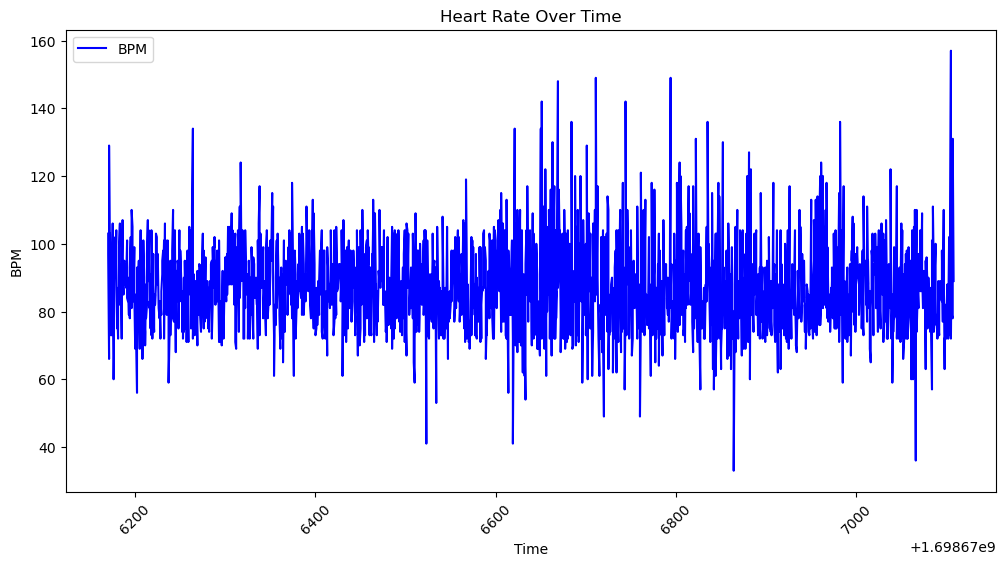

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame (if not already created)
# Replace 'your_data.csv' with the actual file or data source
# This assumes your DataFrame has columns 'time' and 'bpm'
# Example: df = pd.read_csv('your_data.csv')

# Assuming 'time' is in datetime format, if not, you may need to convert it
# Example: df['time'] = pd.to_datetime(df['time'])

# Plot the data
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(df_arin_n['time'], df_arin_n['bpm'], label='BPM', color='b', linestyle='-', marker='')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('BPM')
plt.title('Heart Rate Over Time')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the legend (if multiple lines are plotted)
plt.legend()

# Show the plot
plt.show()


## Convert Unix to Timestamp

In [14]:
import datetime

def convert_unix_to_datetime(data_frame, unix_column_name, datetime_column_name):
    """
    Convert Unix timestamps in a DataFrame to datetime objects.

    Args:
    data_frame (pandas.DataFrame): The input DataFrame.
    unix_column_name (str): The name of the column containing Unix timestamps.
    datetime_column_name (str): The name of the new column to store the datetime objects.

    Returns:
    pandas.DataFrame: The input DataFrame with an additional column of datetime objects.
    """
    data_frame[datetime_column_name] = data_frame[unix_column_name].apply(lambda x: datetime.datetime.fromtimestamp(x))
    return data_frame

# Example usage:
# Replace 'df_arin_n' with your actual DataFrame and column names
# This will add a new column 'datetime' with the converted datetime objects
df_arin_n = convert_unix_to_datetime(df_arin_n, 'time', 'datetime')
df_arin_c = convert_unix_to_datetime(df_arin_c, 'time', 'datetime')
df_alfian_n = convert_unix_to_datetime(df_alfian_n , 'time', 'datetime')
df_alfian_c = convert_unix_to_datetime(df_alfian_c , 'time', 'datetime')
df_vano_n = convert_unix_to_datetime(df_vano_n , 'time', 'datetime')
df_vano_c = convert_unix_to_datetime(df_vano_c , 'time', 'datetime')


In [15]:
df_alfian_c

,time,bpm,gender,fatigue_Level,datetime
0,1698680260,73,0,Medium,2023-10-30 22:37:40
1,1698680260,62,0,Medium,2023-10-30 22:37:40
2,1698680261,97,0,Medium,2023-10-30 22:37:41
3,1698680261,75,0,Medium,2023-10-30 22:37:41
4,1698680262,72,0,Medium,2023-10-30 22:37:42
...,...,...,...,...,...
627,1698680574,56,0,Low,2023-10-30 22:42:54
628,1698680574,180,0,High,2023-10-30 22:42:54
629,1698680575,55,0,Low,2023-10-30 22:42:55
630,1698680575,99,0,Medium,2023-10-30 22:42:55


## Plot Resting HR

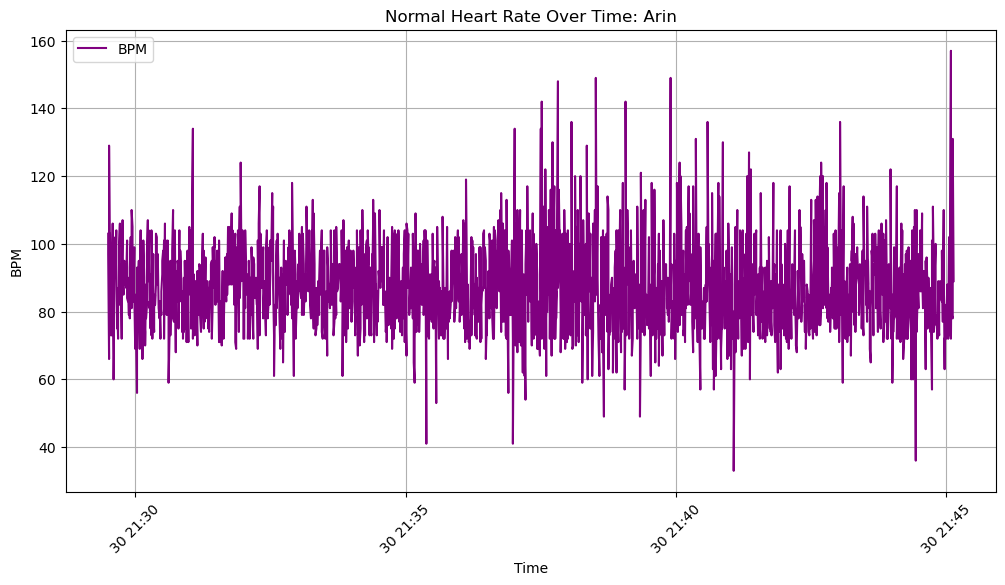

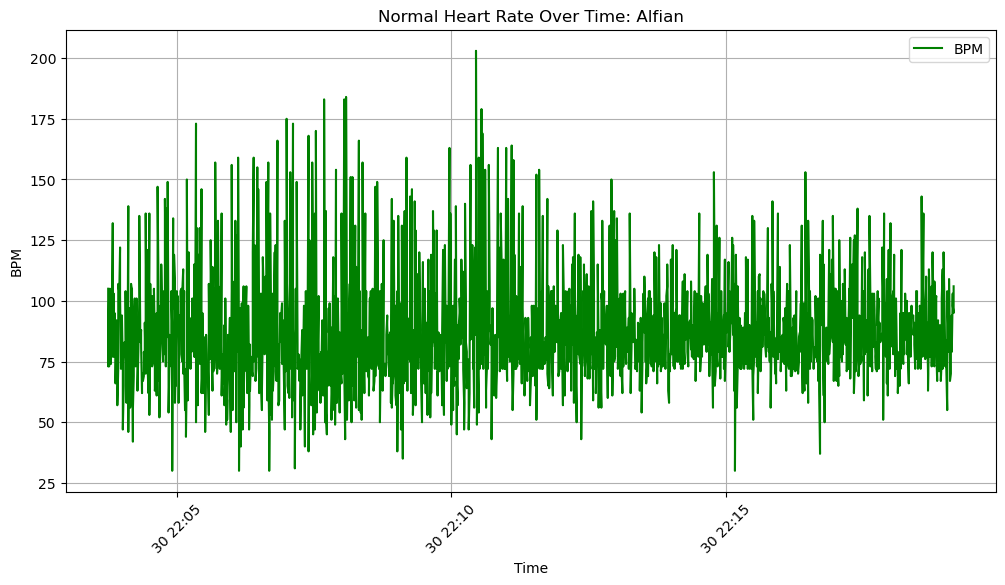

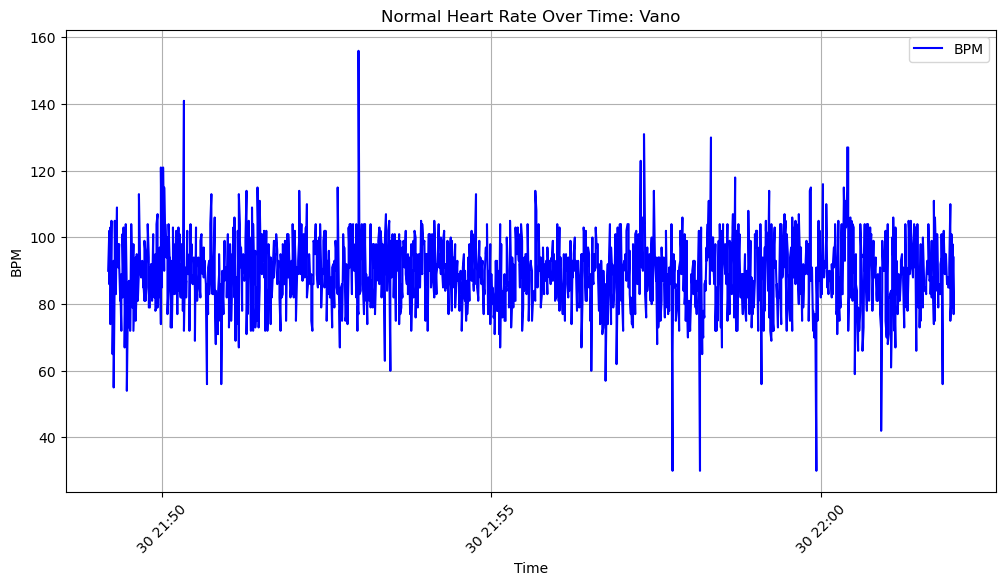

In [16]:

def plot_bpm_data(data_frame, line_color='b', title='Heart Rate Over Time'):
    plt.figure(figsize=(12, 6))
    plt.plot(data_frame['datetime'], data_frame['bpm'], label='BPM', color=line_color, linestyle='-', marker='')
    plt.xlabel('Time')
    plt.ylabel('BPM')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Example usage:
# Replace 'df_vano_c' with your DataFrame and 'r' with the desired line color
plot_bpm_data(df_arin_n, line_color='purple', title='Normal Heart Rate Over Time: Arin')
plot_bpm_data(df_alfian_n, line_color='g', title='Normal Heart Rate Over Time: Alfian')
plot_bpm_data(df_vano_n, line_color='b', title='Normal Heart Rate Over Time: Vano')


## Plot Higher Heart Rate

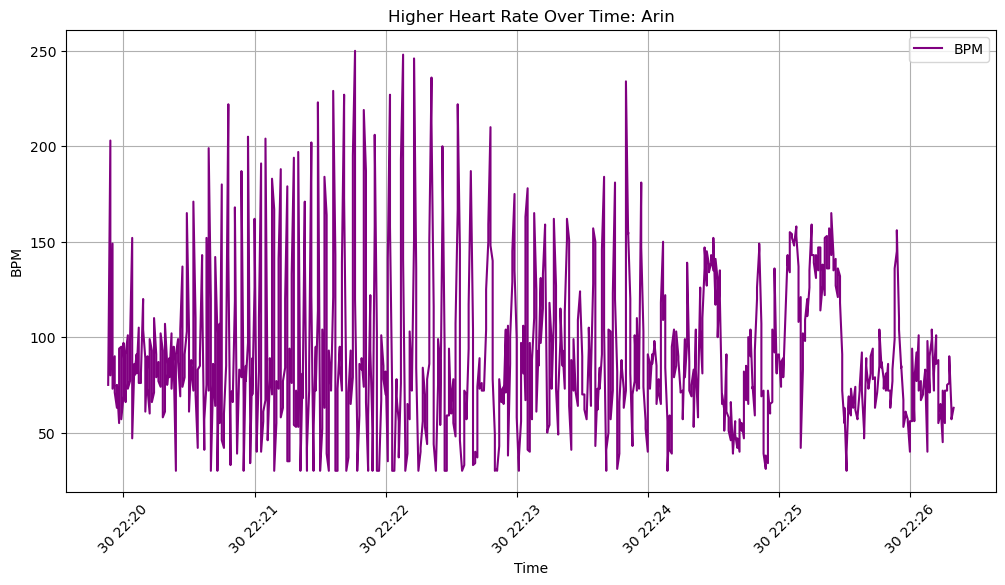

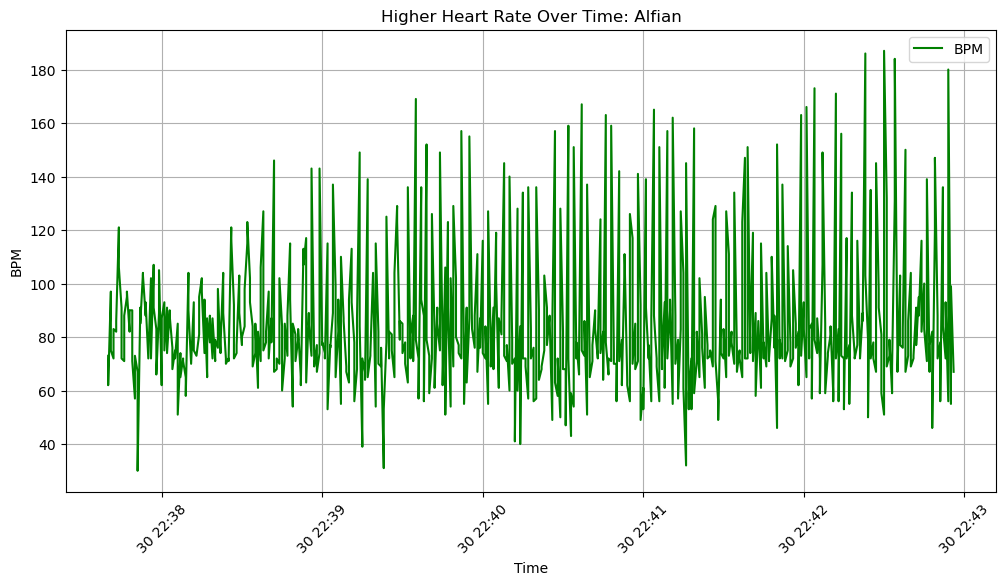

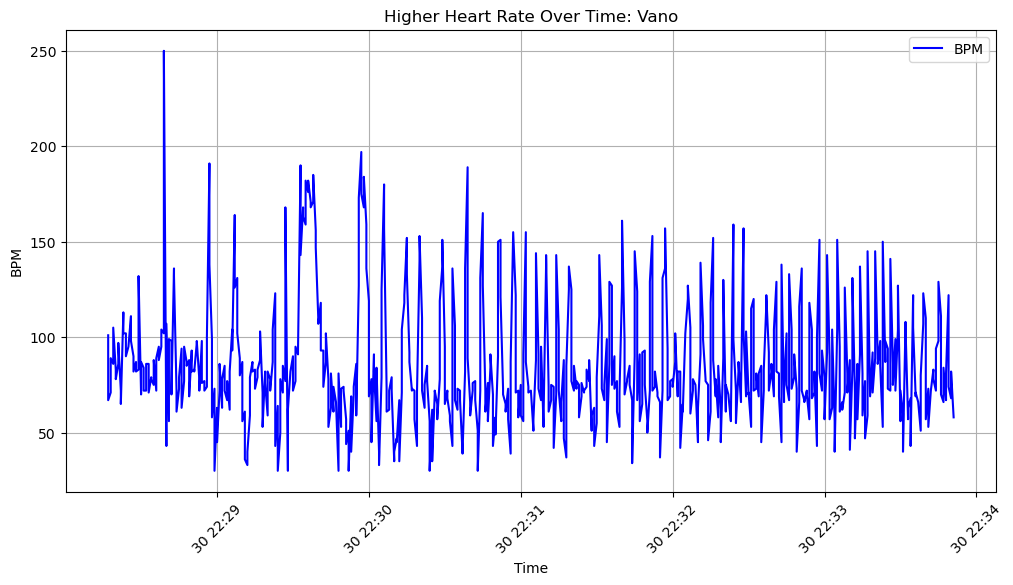

In [17]:
plot_bpm_data(df_arin_c, line_color='purple', title='Higher Heart Rate Over Time: Arin')
plot_bpm_data(df_alfian_c, line_color='g', title='Higher Heart Rate Over Time: Alfian')
plot_bpm_data(df_vano_c, line_color='b', title='Higher Heart Rate Over Time: Vano')


## Zoomed in Plot

#### Higher HR

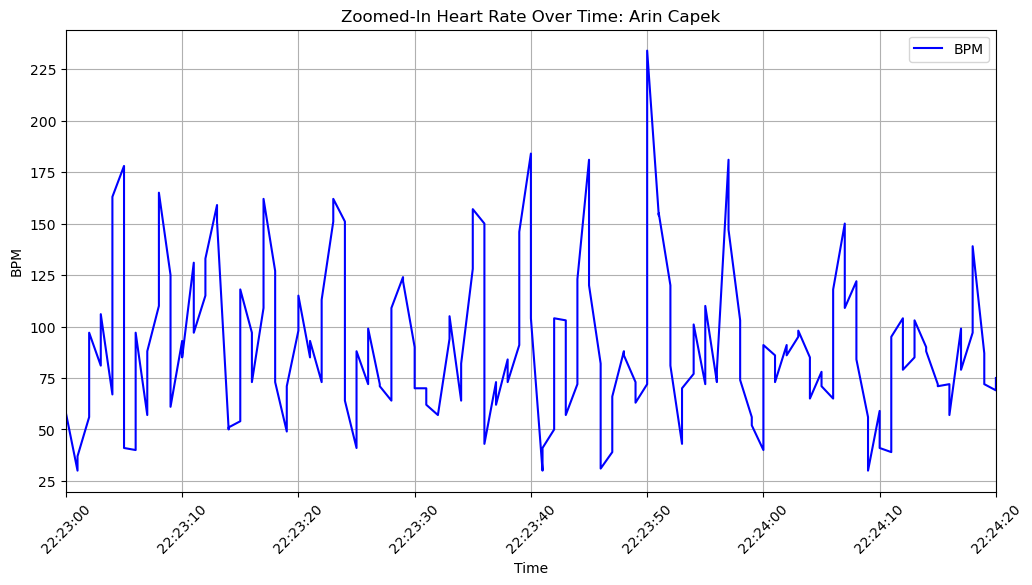

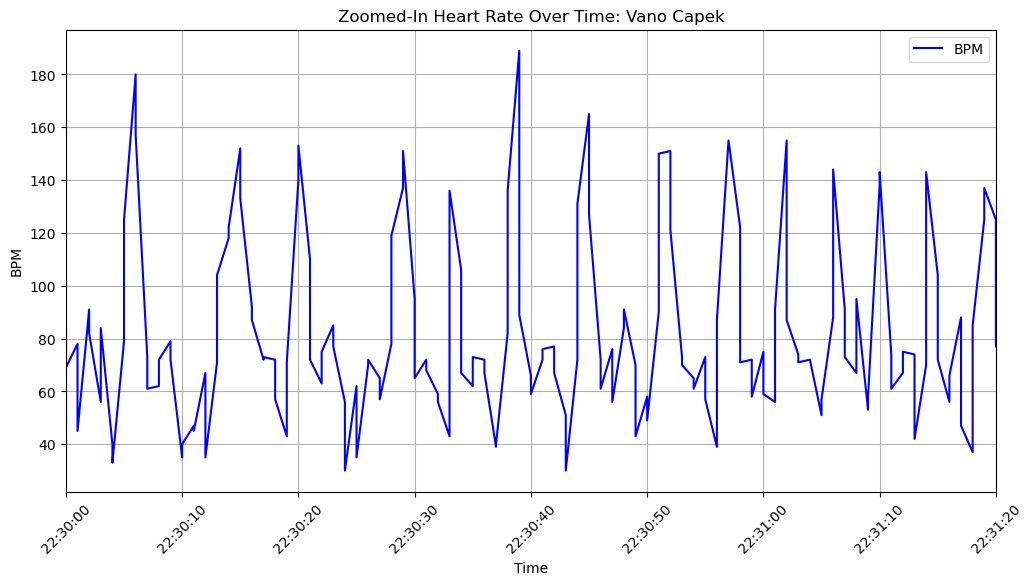

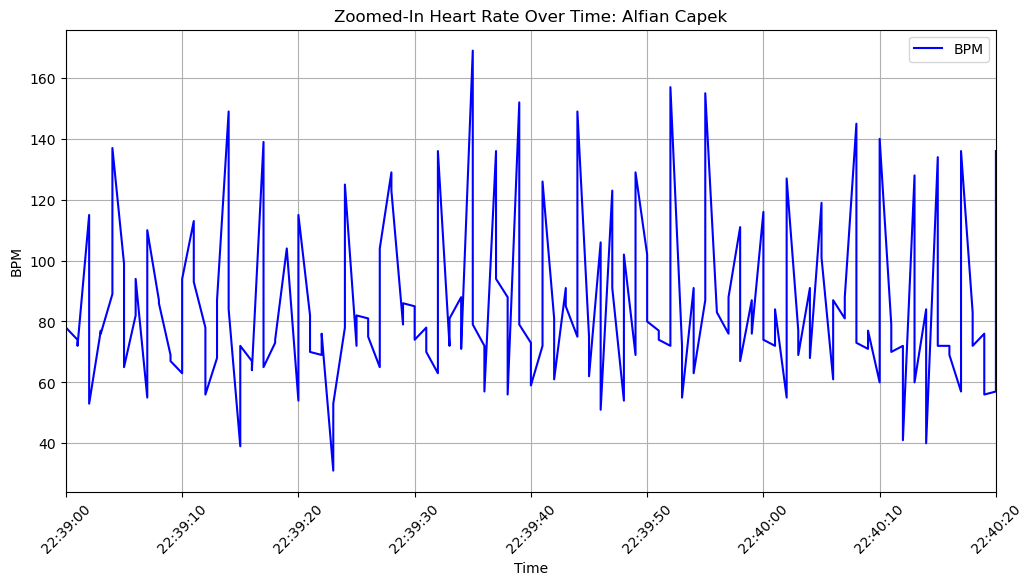

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_zoomed_bpm(data_frame, start_time, end_time, x_label, y_label, title):
    # Convert start_time and end_time to datetime objects
    start_time = pd.Timestamp(start_time)
    end_time = pd.Timestamp(end_time)
    
    # Filter the DataFrame for the specified time range
    zoomed_data = data_frame[(data_frame['datetime'] >= start_time) & (data_frame['datetime'] <= end_time)]

    # Plot the data for the zoomed timeframe
    plt.figure(figsize=(12, 6))  # Set the figure size
    plt.plot(zoomed_data['datetime'], zoomed_data['bpm'], label='BPM', color='b', linestyle='-', marker='')

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Rotate x-axis labels for better readability (optional)
    plt.xticks(rotation=45)

    # Show the legend (if multiple lines are plotted)
    plt.legend()

    # Set the x-axis limits to the zoomed timeframe
    plt.xlim(start_time, end_time)

    # Show the plot
    plt.grid()  # Add grid lines (optional)
    plt.show()

# Example usage:
# Replace with your actual DataFrame, time interval, and labels
zoomed_arin_c = plot_zoomed_bpm(df_arin_c, '2023-10-30 22:23:00', '2023-10-30 22:24:20', 'Time', 'BPM', 'Zoomed-In Heart Rate Over Time: Arin Capek')
zoomed_vano_c = plot_zoomed_bpm(df_vano_c, '2023-10-30 22:30:00', '2023-10-30 22:31:20', 'Time', 'BPM', 'Zoomed-In Heart Rate Over Time: Vano Capek')
zoomed_alfian_c = plot_zoomed_bpm(df_alfian_c, '2023-10-30 22:39:00', '2023-10-30 22:40:20', 'Time', 'BPM', 'Zoomed-In Heart Rate Over Time: Alfian Capek')


Terlihat pattern yang jelas ketika dilakukan pembesaran sinyal HR, terdapat peaks dan valleys yang signifikan terutama saat sedang beraktifitas berat.

#### Normal HR

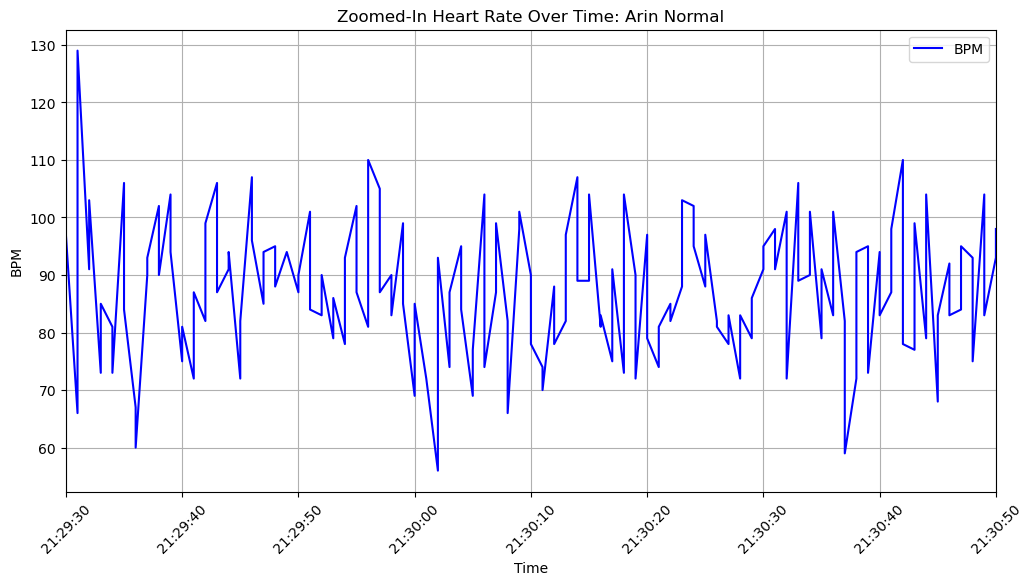

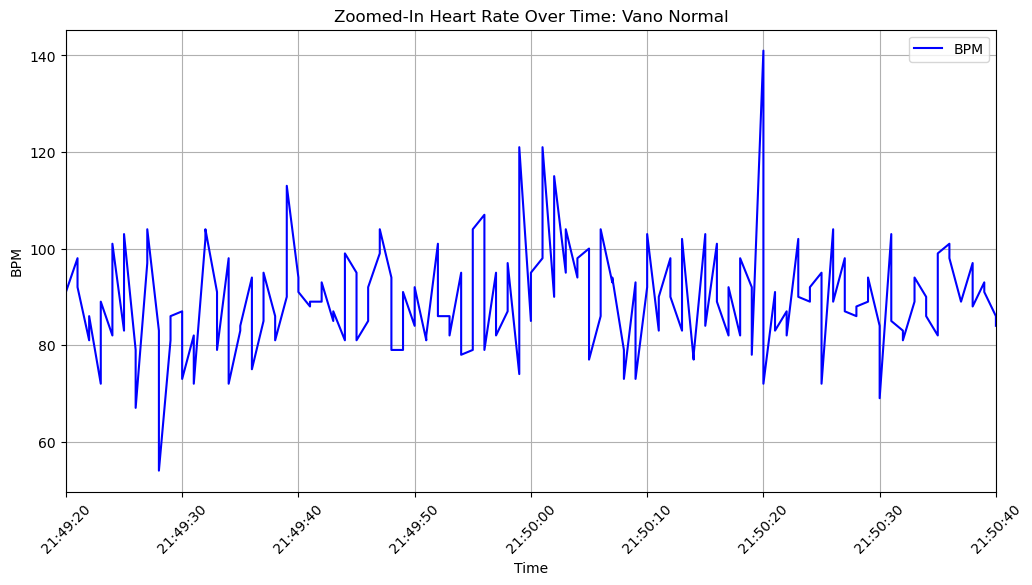

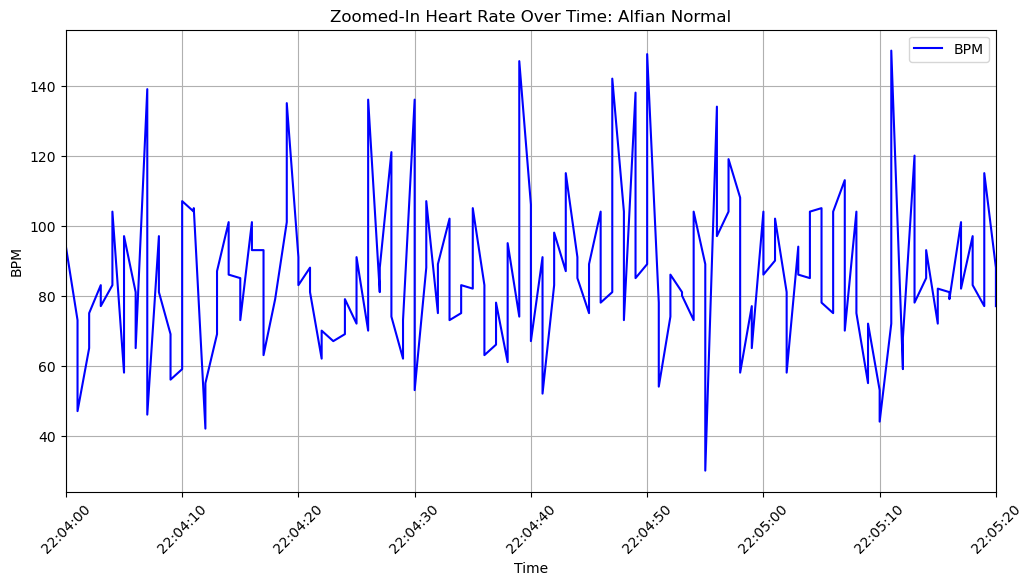

In [19]:
zoomed_arin_n = plot_zoomed_bpm(df_arin_n, '2023-10-30 21:29:30', '2023-10-30 21:30:50', 'Time', 'BPM', 'Zoomed-In Heart Rate Over Time: Arin Normal')
zoomed_vano_n = plot_zoomed_bpm(df_vano_n, '2023-10-30 21:49:20', '2023-10-30 21:50:40', 'Time', 'BPM', 'Zoomed-In Heart Rate Over Time: Vano Normal')
zoomed_alfian_n = plot_zoomed_bpm(df_alfian_n, '2023-10-30 22:04:00', '2023-10-30 22:05:20', 'Time', 'BPM', 'Zoomed-In Heart Rate Over Time: Alfian Normal')


Ketika data di-zoom dalam durasi 1 menit saja data terbaca dengan lebih baik, peaks dan valleys terlihat

## Peak and Valley Detection

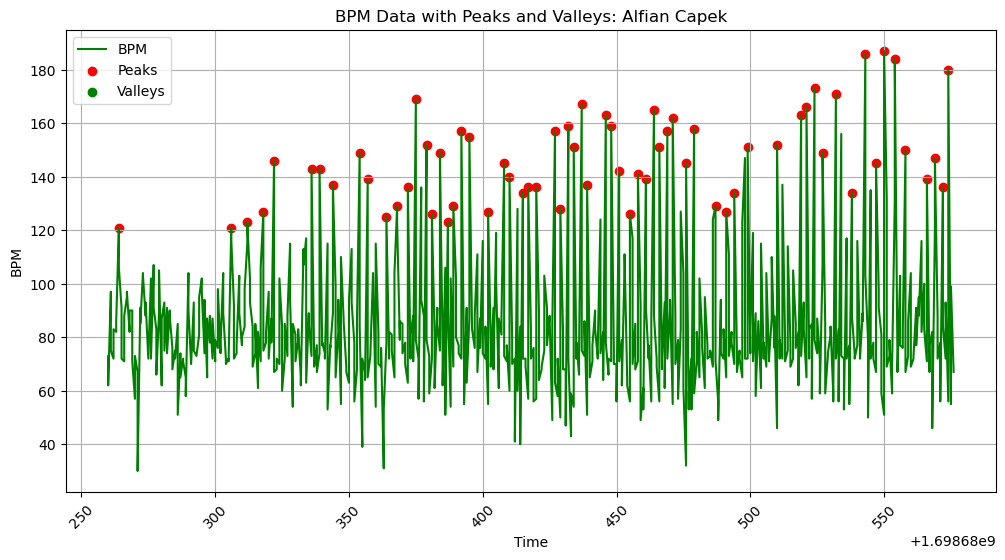

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load BPM data into a DataFrame
# Replace 'your_data.csv' with the actual data source
# Example: df = pd.read_csv('your_data.csv')

# Example: Generate synthetic BPM data (remove this if you have real data)
# Uncomment the following lines and replace them with your actual data
# time = pd.date_range(start='2023-01-01', periods=100, freq='H')
# bpm_data = np.sin(np.linspace(0, 10 * np.pi, 100)) * 40 + 80
# df = pd.DataFrame({'time': time, 'bpm': bpm_data})

# Define peak detection parameters
min_peak_height = 120  # Adjust this threshold as needed
min_peak_distance = 5  # Adjust this distance as needed

# Detect peaks and valleys
peaks, _ = find_peaks(df_alfian_c['bpm'], height=min_peak_height, distance=min_peak_distance)
valleys, _ = find_peaks(-df_alfian_c['bpm'], height=min_peak_height, distance=min_peak_distance)

# Plot the BPM data
plt.figure(figsize=(12, 6))
plt.plot(df_alfian_c['time'], df_alfian_c['bpm'], label='BPM', color='green', linestyle='-')
plt.scatter(df_alfian_c['time'][peaks], df_alfian_c['bpm'][peaks], marker='o', color='r', label='Peaks')
plt.scatter(df_alfian_c['time'][valleys], df_alfian_c['bpm'][valleys], marker='o', color='g', label='Valleys')

plt.xlabel('Time')
plt.ylabel('BPM')
plt.title('BPM Data with Peaks and Valleys: Alfian Capek')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


### Plot Peaks for High HR 

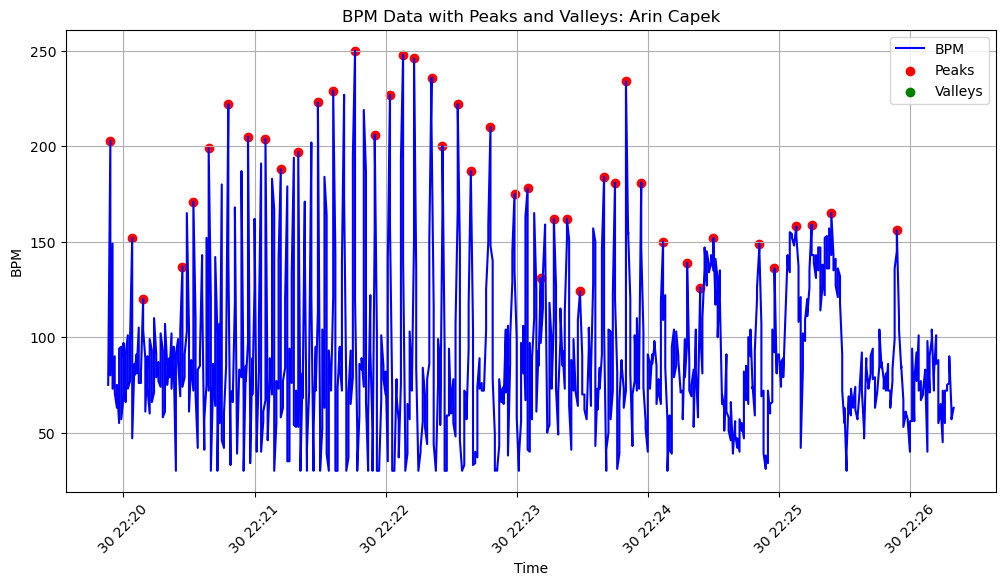

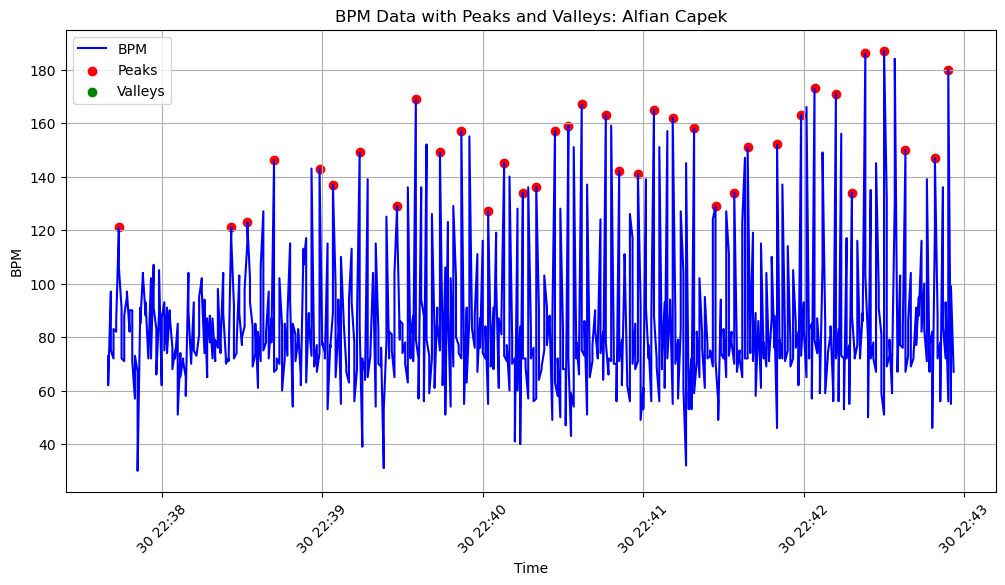

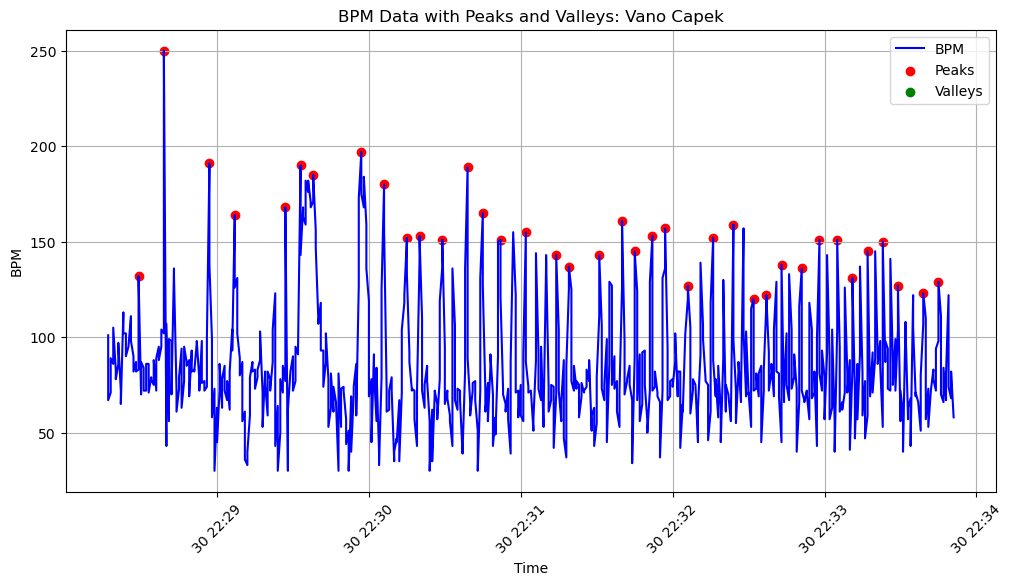

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def plot_bpm_with_peaks_and_valleys(data_frame, title, x_label, y_label, peak_height=120, peak_distance=10, valley_height=50):
    # Detect peaks
    peaks, _ = find_peaks(data_frame['bpm'], height=peak_height, distance=peak_distance)
    
    # Detect valleys
    valleys, _ = find_peaks(-data_frame['bpm'], height=valley_height, distance=peak_distance)

    # Plot the BPM data
    plt.figure(figsize=(12, 6))
    plt.plot(data_frame['datetime'], data_frame['bpm'], label='BPM', color='b', linestyle='-')
    plt.scatter(data_frame['datetime'][peaks], data_frame['bpm'][peaks], marker='o', color='r', label='Peaks')
    plt.scatter(data_frame['datetime'][valleys], data_frame['bpm'][valleys], marker='o', color='g', label='Valleys')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.show()

# Example usage:
# Replace with your actual DataFrame, parameters, and labels
plot_arin_c = plot_bpm_with_peaks_and_valleys(df_arin_c, title='BPM Data with Peaks and Valleys: Arin Capek', x_label='Time', y_label='BPM')
plot_alfian_c = plot_bpm_with_peaks_and_valleys(df_alfian_c, title='BPM Data with Peaks and Valleys: Alfian Capek', x_label='Time', y_label='BPM')
plot_vano_c = plot_bpm_with_peaks_and_valleys(df_vano_c, title='BPM Data with Peaks and Valleys: Vano Capek', x_label='Time', y_label='BPM')


### Plot Peaks for Normal HR

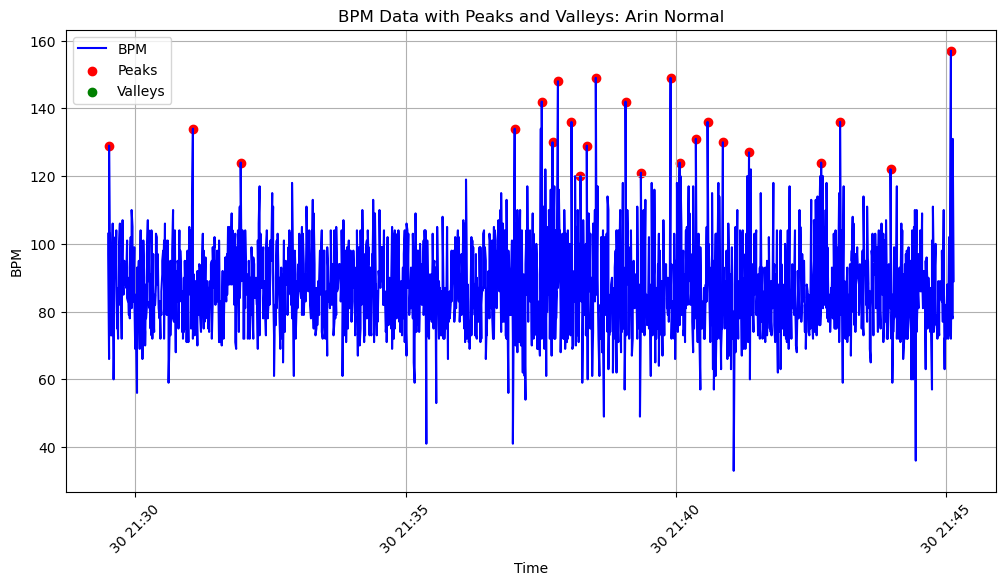

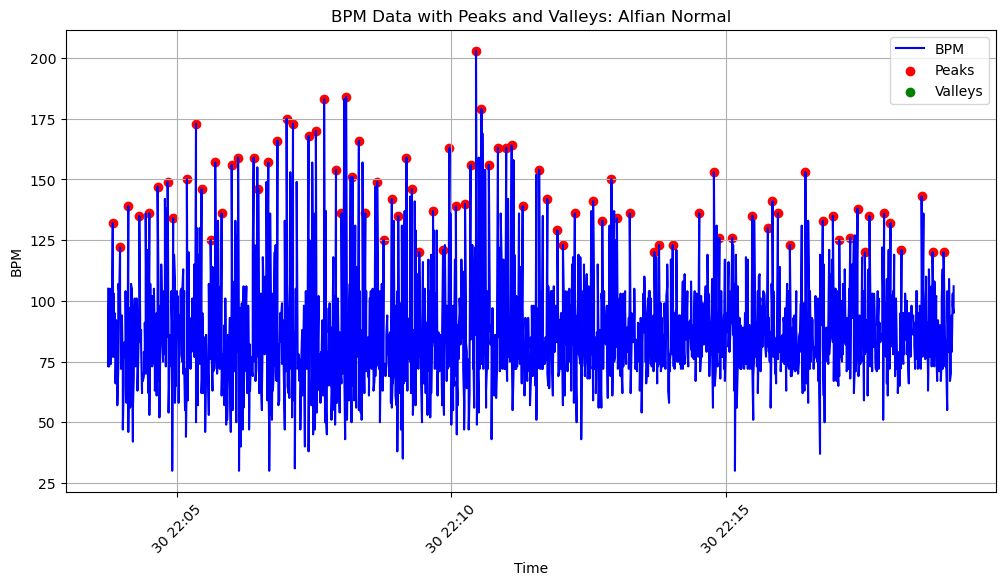

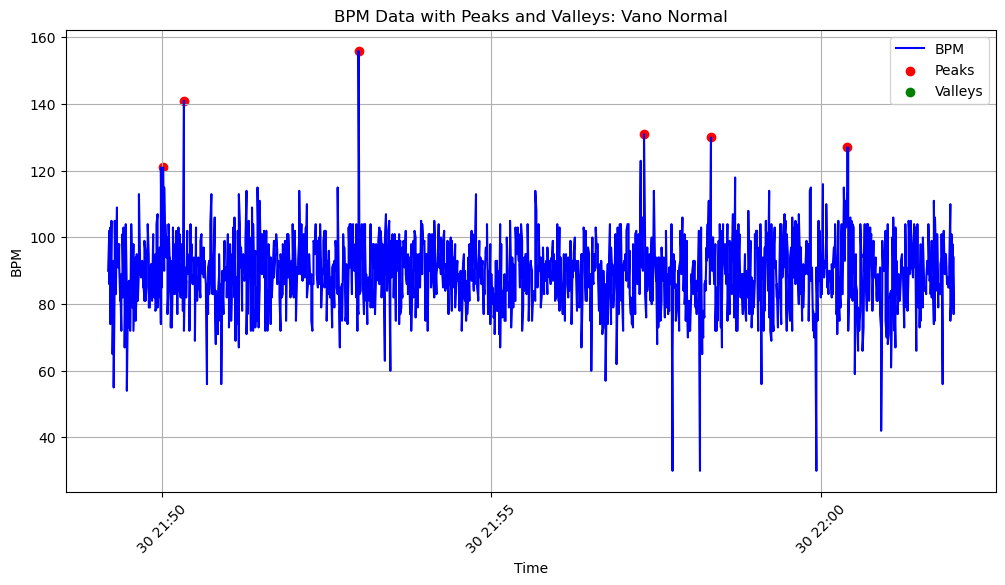

In [22]:
plot_arin_n = plot_bpm_with_peaks_and_valleys(df_arin_n, title='BPM Data with Peaks and Valleys: Arin Normal', x_label='Time', y_label='BPM')
plot_alfian_n = plot_bpm_with_peaks_and_valleys(df_alfian_n, title='BPM Data with Peaks and Valleys: Alfian Normal', x_label='Time', y_label='BPM')
plot_vano_n = plot_bpm_with_peaks_and_valleys(df_vano_n, title='BPM Data with Peaks and Valleys: Vano Normal', x_label='Time', y_label='BPM')


## Find Average Inter-Peaks Interval

In [23]:

def average_peak_interval(data_frame):
    # Detect peaks
    peaks, _ = find_peaks(data_frame['bpm'], height=120, distance=10)
    
    # Calculate time intervals between peaks
    peak_times = data_frame['datetime'][peaks]
    time_intervals = peak_times.diff().dt.total_seconds()
    
    # Calculate the average time interval
    average_interval = time_intervals.mean()
    
    return average_interval

# Example usage:
# Replace with your actual DataFrame
avg_intervl_arin_c = average_peak_interval(df_arin_c)
avg_intervl_arin_n = average_peak_interval(df_arin_n)
avg_intervl_alfian_c = average_peak_interval(df_alfian_c)
avg_intervl_alfian_n = average_peak_interval(df_alfian_n)
avg_intervl_vano_c = average_peak_interval(df_vano_c)
avg_intervl_vano_n = average_peak_interval(df_vano_n)


In [24]:

# Create a DataFrame to store the results
avg_intervl_df = pd.DataFrame(columns=['Dataset', 'Average Peak Interval (seconds)'])

# Example datasets and average intervals (replace with your actual data)
datasets = ['Arin_C', 'Arin_N', 'Alfian_C', 'Alfian_N', 'Vano_C', 'Vano_N']
avg_intervals = [avg_intervl_arin_c, avg_intervl_arin_n, avg_intervl_alfian_c, avg_intervl_alfian_n, avg_intervl_vano_c, avg_intervl_vano_n]

# Add data to the DataFrame
avg_intervl_df['Dataset'] = datasets
avg_intervl_df['Average Peak Interval (seconds)'] = avg_intervals

# Print the DataFrame
print(avg_intervl_df)


    Dataset  Average Peak Interval (seconds)
0    Arin_C                         8.571429
1    Arin_N                        42.454545
2  Alfian_C                         8.611111
3  Alfian_N                        10.558140
4    Vano_C                         8.540541
5    Vano_N                       124.600000


In [25]:
import pandas as pd

# Create a DataFrame with 'Category' and 'Average Peak Interval (seconds)'
data = {
    'Dataset' : ['Arin_C', 'Arin_N', 'Alfian_C', 'Alfian_N', 'Vano_C', 'Vano_N'],
    'Average Peak Interval (seconds)': [8.571429, 42.454545, 8.611111, 10.558140, 8.540541, 124.600000],
    'Category': ['High HR', 'Normal HR', 'High HR', 'Normal HR', 'High HR', 'Normal HR'],
}

avg_intervl_df = pd.DataFrame(data)

# Calculate the mean for 'High HR' data
avg_intervl_c = avg_intervl_df[avg_intervl_df['Category'] == 'High HR']['Average Peak Interval (seconds)'].mean()

# Calculate the mean for 'Normal HR' data
avg_intervl_n = avg_intervl_df[avg_intervl_df['Category'] == 'Normal HR']['Average Peak Interval (seconds)'].mean()

# Calculate the overall mean
overall_mean = (avg_intervl_c + avg_intervl_n) / 2

print(f"Mean interval peaks for High HR data: {avg_intervl_c}")
print(f"Mean interval peaks for Normal HR data: {avg_intervl_n}")
print(f"Overall Mean: {overall_mean}")
avg_intervl_df

Mean interval peaks for High HR data: 8.574360333333333
Mean interval peaks for Normal HR data: 59.20422833333333
Overall Mean: 33.88929433333333


,Dataset,Average Peak Interval (seconds),Category
0,Arin_C,8.571429,High HR
1,Arin_N,42.454545,Normal HR
2,Alfian_C,8.611111,High HR
3,Alfian_N,10.558140,Normal HR
4,Vano_C,8.540541,High HR
5,Vano_N,124.600000,Normal HR


In [26]:
# Define the average interval in seconds
avg_high_intrvl = 8.574360333333333  # 8 seconds
avg_normal_intrvl = 59.20422833333333 

# Define the sampling frequency (samples per second)
sampling_frequency = 2  # 1 sample per second (adjust this to your data)

# Calculate the distance based on average interval and sampling frequency
high_hr_distance = float(avg_high_intrvl * sampling_frequency)
normal_hr_distance = float(avg_normal_intrvl * sampling_frequency)

print("High HR Distance: " + str(high_hr_distance))
print("Normal HR Distance: " + str(normal_hr_distance))

High HR Distance: 17.148720666666666
Normal HR Distance: 118.40845666666667


Dapat dilihat bahwa terdapat perbedaan frekuensi peaks saat keadaan Heart-Rate normal dan saat beraktifitas berat. Biasanya terjadi 1 cycle high fatigue setiap 17 input atau sebanyak 8.5s sampel masuk.

# Data Preprocessing

In [27]:
# Concatenate the DataFrames vertically by providing them in a list
dfs = [df_arin_n, df_vano_n, df_alfian_n, df_arin_c, df_vano_c, df_alfian_c]
merged_df = pd.concat(dfs, axis=0)
merged_df

,time,bpm,gender,fatigue_Level,datetime
0,1698676170,103,1,Medium,2023-10-30 21:29:30
1,1698676170,97,1,Medium,2023-10-30 21:29:30
2,1698676171,66,1,Medium,2023-10-30 21:29:31
3,1698676171,129,1,High,2023-10-30 21:29:31
4,1698676172,91,1,Medium,2023-10-30 21:29:32
...,...,...,...,...,...
627,1698680574,56,0,Low,2023-10-30 22:42:54
628,1698680574,180,0,High,2023-10-30 22:42:54
629,1698680575,55,0,Low,2023-10-30 22:42:55
630,1698680575,99,0,Medium,2023-10-30 22:42:55


In [28]:
# Define a mapping from labels to numeric values
label_mapping = {"Low": 0, "Medium": 1, "High": 2}

# Use the map function to encode the column
merged_df["encoded_fatigue_Level"] = merged_df["fatigue_Level"].map(label_mapping)

# Print the DataFrame with the encoded column
merged_df

,time,bpm,gender,fatigue_Level,datetime,encoded_fatigue_Level
0,1698676170,103,1,Medium,2023-10-30 21:29:30,1
1,1698676170,97,1,Medium,2023-10-30 21:29:30,1
2,1698676171,66,1,Medium,2023-10-30 21:29:31,1
3,1698676171,129,1,High,2023-10-30 21:29:31,2
4,1698676172,91,1,Medium,2023-10-30 21:29:32,1
...,...,...,...,...,...,...
627,1698680574,56,0,Low,2023-10-30 22:42:54,0
628,1698680574,180,0,High,2023-10-30 22:42:54,2
629,1698680575,55,0,Low,2023-10-30 22:42:55,0
630,1698680575,99,0,Medium,2023-10-30 22:42:55,1


In [29]:
# Create a new dataframe to store the results
new_df = pd.DataFrame()

n=17

# Iterate over the rows of the original dataframe
for i in range(0, len(merged_df), n):

    # Create a list to store the values of every n row from before
    values = []

    # Iterate over the columns of the original dataframe
    for j in range(len(merged_df.columns)):

        # Get the values of every n row from before
        values.append(merged_df.iloc[i:i+n, j].tolist())

    # Create a new dataframe from the list
    new_df_temp = pd.DataFrame(data=[values], columns=merged_df.columns)

    # Concatenate the new dataframe with the existing dataframe
    new_df = pd.concat([new_df, new_df_temp], ignore_index=True)

new_df

,time,bpm,gender,fatigue_Level,datetime,encoded_fatigue_Level
0,"[1698676170, 1698676170, 1698676171, 169867617...","[103, 97, 66, 129, 91, 103, 73, 85, 81, 73, 10...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Medium, Medium, Medium, High, Medium, Medium,...","[2023-10-30 21:29:30, 2023-10-30 21:29:30, 202...","[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, ..."
1,"[1698676178, 1698676179, 1698676179, 169867618...","[90, 104, 94, 75, 81, 72, 87, 82, 99, 106, 87,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Medium, Medium, Medium, Medium, Medium, Mediu...","[2023-10-30 21:29:38, 2023-10-30 21:29:39, 202...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,"[1698676187, 1698676187, 1698676188, 169867618...","[85, 94, 95, 88, 94, 94, 87, 90, 101, 84, 83, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Medium, Medium, Medium, Medium, Medium, Mediu...","[2023-10-30 21:29:47, 2023-10-30 21:29:47, 202...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,"[1698676195, 1698676196, 1698676196, 169867619...","[87, 81, 110, 105, 87, 90, 83, 99, 85, 69, 85,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Medium, Medium, Medium, Medium, Medium, Mediu...","[2023-10-30 21:29:55, 2023-10-30 21:29:56, 202...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ..."
4,"[1698676204, 1698676204, 1698676205, 169867620...","[95, 84, 69, 77, 104, 74, 87, 99, 82, 66, 98, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Medium, Medium, Medium, Medium, Medium, Mediu...","[2023-10-30 21:30:04, 2023-10-30 21:30:04, 202...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...,...,...,...
427,"[1698680541, 1698680541, 1698680542, 169868054...","[75, 72, 89, 86, 186, 103, 79, 50, 135, 72, 78...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Medium, Medium, Medium, Medium, High, Medium,...","[2023-10-30 22:42:21, 2023-10-30 22:42:21, 202...","[1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, ..."
428,"[1698680549, 1698680550, 1698680550, 169868055...","[59, 51, 187, 132, 69, 73, 79, 59, 69, 131, 18...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Low, Low, High, High, Medium, Medium, Medium,...","[2023-10-30 22:42:29, 2023-10-30 22:42:30, 202...","[0, 0, 2, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, ..."
429,"[1698680558, 1698680558, 1698680559, 169868055...","[150, 67, 73, 86, 104, 69, 72, 73, 91, 77, 95,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[High, Medium, Medium, Medium, Medium, Medium,...","[2023-10-30 22:42:38, 2023-10-30 22:42:38, 202...","[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
430,"[1698680566, 1698680567, 1698680567, 169868056...","[139, 67, 77, 82, 46, 120, 147, 88, 72, 78, 56...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[High, Medium, Medium, Medium, Low, High, High...","[2023-10-30 22:42:46, 2023-10-30 22:42:47, 202...","[2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, ..."


In [30]:
new_df.columns

Index(['time', 'bpm', 'gender', 'fatigue_Level', 'datetime',
       'encoded_fatigue_Level'],
      dtype='object')

In [31]:
# Define a function to check if a list contains both 1 and 0
def has_both_1_and_0(lst):
    return 1 in lst and 0 in lst

# Use the apply method to create a boolean mask
mask = new_df['gender'].apply(has_both_1_and_0)

# Filter the DataFrame to keep only the rows where the condition is False
filtered_df = new_df[~mask]

# Print the filtered DataFrame
filtered_df

,time,bpm,gender,fatigue_Level,datetime,encoded_fatigue_Level
0,"[1698676170, 1698676170, 1698676171, 169867617...","[103, 97, 66, 129, 91, 103, 73, 85, 81, 73, 10...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Medium, Medium, Medium, High, Medium, Medium,...","[2023-10-30 21:29:30, 2023-10-30 21:29:30, 202...","[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, ..."
1,"[1698676178, 1698676179, 1698676179, 169867618...","[90, 104, 94, 75, 81, 72, 87, 82, 99, 106, 87,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Medium, Medium, Medium, Medium, Medium, Mediu...","[2023-10-30 21:29:38, 2023-10-30 21:29:39, 202...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,"[1698676187, 1698676187, 1698676188, 169867618...","[85, 94, 95, 88, 94, 94, 87, 90, 101, 84, 83, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Medium, Medium, Medium, Medium, Medium, Mediu...","[2023-10-30 21:29:47, 2023-10-30 21:29:47, 202...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,"[1698676195, 1698676196, 1698676196, 169867619...","[87, 81, 110, 105, 87, 90, 83, 99, 85, 69, 85,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Medium, Medium, Medium, Medium, Medium, Mediu...","[2023-10-30 21:29:55, 2023-10-30 21:29:56, 202...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ..."
4,"[1698676204, 1698676204, 1698676205, 169867620...","[95, 84, 69, 77, 104, 74, 87, 99, 82, 66, 98, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Medium, Medium, Medium, Medium, Medium, Mediu...","[2023-10-30 21:30:04, 2023-10-30 21:30:04, 202...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...,...,...,...
427,"[1698680541, 1698680541, 1698680542, 169868054...","[75, 72, 89, 86, 186, 103, 79, 50, 135, 72, 78...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Medium, Medium, Medium, Medium, High, Medium,...","[2023-10-30 22:42:21, 2023-10-30 22:42:21, 202...","[1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, ..."
428,"[1698680549, 1698680550, 1698680550, 169868055...","[59, 51, 187, 132, 69, 73, 79, 59, 69, 131, 18...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Low, Low, High, High, Medium, Medium, Medium,...","[2023-10-30 22:42:29, 2023-10-30 22:42:30, 202...","[0, 0, 2, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, ..."
429,"[1698680558, 1698680558, 1698680559, 169868055...","[150, 67, 73, 86, 104, 69, 72, 73, 91, 77, 95,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[High, Medium, Medium, Medium, Medium, Medium,...","[2023-10-30 22:42:38, 2023-10-30 22:42:38, 202...","[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
430,"[1698680566, 1698680567, 1698680567, 169868056...","[139, 67, 77, 82, 46, 120, 147, 88, 72, 78, 56...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[High, Medium, Medium, Medium, Low, High, High...","[2023-10-30 22:42:46, 2023-10-30 22:42:47, 202...","[2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, ..."


In [32]:
# Define a function to get the mode of a list
def get_mode(lst):
    try:
        return max(set(lst), key=lst.count)
    except ValueError:
        return None

# Apply the get_mode function to each row in "fatigue_Level" and "encoded_fatigue_Level"
new_df["fatigue_Level"] = new_df["fatigue_Level"].apply(get_mode)
new_df["encoded_fatigue_Level"] = new_df["encoded_fatigue_Level"].apply(get_mode)
new_df["gender"] = new_df["gender"].apply(get_mode)

# Print the DataFrame with majority labels
new_df

,time,bpm,gender,fatigue_Level,datetime,encoded_fatigue_Level
0,"[1698676170, 1698676170, 1698676171, 169867617...","[103, 97, 66, 129, 91, 103, 73, 85, 81, 73, 10...",1,Medium,"[2023-10-30 21:29:30, 2023-10-30 21:29:30, 202...",1
1,"[1698676178, 1698676179, 1698676179, 169867618...","[90, 104, 94, 75, 81, 72, 87, 82, 99, 106, 87,...",1,Medium,"[2023-10-30 21:29:38, 2023-10-30 21:29:39, 202...",1
2,"[1698676187, 1698676187, 1698676188, 169867618...","[85, 94, 95, 88, 94, 94, 87, 90, 101, 84, 83, ...",1,Medium,"[2023-10-30 21:29:47, 2023-10-30 21:29:47, 202...",1
3,"[1698676195, 1698676196, 1698676196, 169867619...","[87, 81, 110, 105, 87, 90, 83, 99, 85, 69, 85,...",1,Medium,"[2023-10-30 21:29:55, 2023-10-30 21:29:56, 202...",1
4,"[1698676204, 1698676204, 1698676205, 169867620...","[95, 84, 69, 77, 104, 74, 87, 99, 82, 66, 98, ...",1,Medium,"[2023-10-30 21:30:04, 2023-10-30 21:30:04, 202...",1
...,...,...,...,...,...,...
427,"[1698680541, 1698680541, 1698680542, 169868054...","[75, 72, 89, 86, 186, 103, 79, 50, 135, 72, 78...",0,Medium,"[2023-10-30 22:42:21, 2023-10-30 22:42:21, 202...",1
428,"[1698680549, 1698680550, 1698680550, 169868055...","[59, 51, 187, 132, 69, 73, 79, 59, 69, 131, 18...",0,Medium,"[2023-10-30 22:42:29, 2023-10-30 22:42:30, 202...",1
429,"[1698680558, 1698680558, 1698680559, 169868055...","[150, 67, 73, 86, 104, 69, 72, 73, 91, 77, 95,...",0,Medium,"[2023-10-30 22:42:38, 2023-10-30 22:42:38, 202...",1
430,"[1698680566, 1698680567, 1698680567, 169868056...","[139, 67, 77, 82, 46, 120, 147, 88, 72, 78, 56...",0,Medium,"[2023-10-30 22:42:46, 2023-10-30 22:42:47, 202...",1


Create a new dataframe that takes 17 inputs of bpm into a list with 1 representing label from the majority of labels from the list.

In [33]:
flattened_list = [item for sublist in filtered_df['bpm'] for item in sublist]
np_array = np.array(flattened_list)
np_array

array([103,  97,  66, ...,  55,  99,  67])

# Create Model (Random Forest Classifier)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
X = merged_df[['bpm', 'gender', 'time']]
y = merged_df['encoded_fatigue_Level']

## Rolling Window Method

In [35]:
# Load your DataFrame
# df = pd.read_csv('your_data.csv')

# Define the window size
window_size = 17

# Initialize lists to store features (X) and labels (y)
X_data = []
y_data = []

# Iterate through the DataFrame using a rolling window
for i in range(len(merged_df) - window_size + 1):
    window = merged_df.iloc[i:i + window_size]
    X_window = window.drop(columns=['encoded_fatigue_Level', 'datetime', 'fatigue_Level'])
    y_window = window['encoded_fatigue_Level'].values[-1]  # Use the label from the last row in the window
    X_data.append(X_window.values.flatten())  # Flatten the features for each window
    y_data.append(y_window)

X_data = pd.DataFrame(X_data)
y_data = pd.Series(y_data)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [37]:
clf = RandomForestClassifier(n_estimators=100, random_state=42, 
                             max_depth=10, min_samples_split=3, min_samples_leaf=1)  # You can adjust hyperparameters as needed
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_split=3, random_state=42)

In [38]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
from sklearn.metrics import classification_report

# Assuming you already have your model and predictions (y_pred) as defined earlier
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.9835953520164047
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.89        78
           1       0.98      1.00      0.99      1253
           2       1.00      0.94      0.97       132

    accuracy                           0.98      1463
   macro avg       0.99      0.91      0.95      1463
weighted avg       0.98      0.98      0.98      1463



In [39]:
print(y_pred)

[1 1 0 ... 1 1 1]


In [40]:
y_pred.size

1463

## Batch Processing Method

In [41]:

X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

batch_size = 17

In [42]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, 
                             max_depth=10, min_samples_split=3, min_samples_leaf=1)  # You can adjust hyperparameters as needed


Test Set Accuracy: 0.92
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       169
           1       0.92      0.99      0.95      2069
           2       0.91      0.89      0.90       181

    accuracy                           0.92      2419
   macro avg       0.61      0.63      0.62      2419
weighted avg       0.85      0.92      0.88      2419

Confusion Matrix:
 [[ 329    7    0]
 [   0 4179    0]
 [   0    8  388]]


/Users/resiyanda2002/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/resiyanda2002/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/resiyanda2002/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


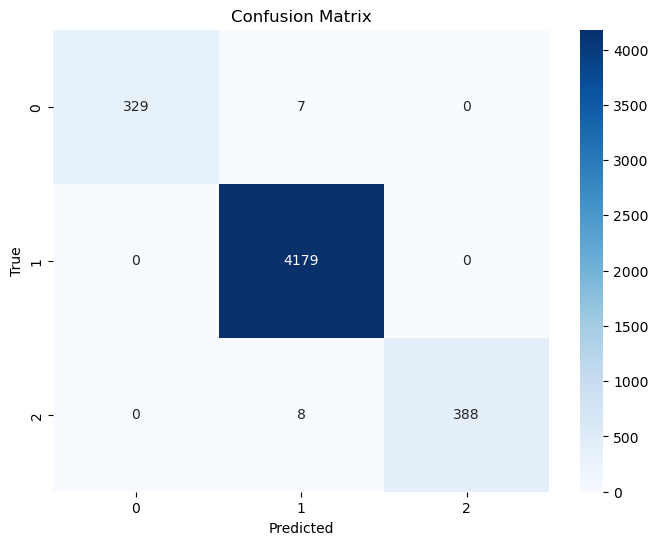

Predicted Classes for the Last Entry in Each Testing Batch: [1, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1]


In [43]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize lists to store batch predictions and true labels
batch_predictions = []
true_labels = []

# Iterate through the data in batches
for i in range(0, len(X2_train), batch_size):
    # Extract a batch of data
    X_batch = X2_train.iloc[i:i + batch_size]
    y_batch = y2_train.iloc[i:i + batch_size]
    
    # Fit the Random Forest model on the current batch
    rf_classifier.fit(X_batch, y_batch)
    
    # Make predictions on the batch
    batch_predictions.extend(rf_classifier.predict(X_batch))
    true_labels.extend(y_batch)

# Make predictions for the test set
test_predictions = rf_classifier.predict(X2_test)

# Calculate and print the accuracy on the test set
test_accuracy = accuracy_score(y2_test, test_predictions)
print(f'Test Set Accuracy: {test_accuracy:.2f}')

# Calculate and print the classification report for the test set
test_classification_report = classification_report(y2_test, test_predictions)
print("Test Set Classification Report:\n", test_classification_report)

# Create the confusion matrix for the test set
conf_matrix = confusion_matrix(true_labels, batch_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix in a heatmap
class_labels = np.unique(y2_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Extract and print the predicted classes for the last entry in each testing batch
predicted_classes = [batch_predictions[i:i + batch_size][-1] for i in range(0, len(X2_test), batch_size)]
print("Predicted Classes for the Last Entry in Each Testing Batch:", predicted_classes)


Test Set Accuracy: 0.91
Test Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.02      0.04       106
           1       0.91      1.00      0.95      1261
           2       0.95      0.78      0.86        99

    accuracy                           0.91      1466
   macro avg       0.95      0.60      0.61      1466
weighted avg       0.92      0.91      0.88      1466

Confusion Matrix:
 [[ 388   11    0]
 [   0 4987    0]
 [   0   13  465]]


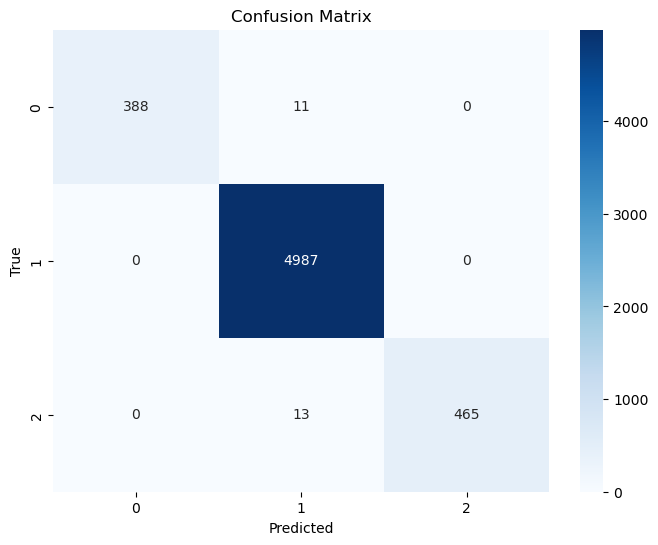

Predicted Classes for the Last Entry in Each Testing Batch: [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [44]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset, assuming it's stored in a Pandas DataFrame
# Make sure to drop the non-essential columns, such as 'datetime', as they won't be used for modeling
# Example: df = pd.read_csv('your_data.csv').drop(columns=['datetime'])

# Define the number of data entries per batch
batch_size = 17

# Initialize lists to store batch predictions and true labels
batch_predictions = []
true_labels = []

# Initialize the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, 
                                       max_depth=10, min_samples_split=3, min_samples_leaf=1)

# Split the data into features (X) and the target (y)
X2 = merged_df.drop(columns=['encoded_fatigue_Level', 'datetime', 'fatigue_Level'])
y2 = merged_df['encoded_fatigue_Level']

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Iterate through the data in batches
for i in range(0, len(X2_train), batch_size):
    # Extract a batch of data
    X_batch = X2_train.iloc[i:i + batch_size]
    y_batch = y2_train.iloc[i:i + batch_size]
    
    # Fit the Random Forest model on the current batch
    rf_classifier.fit(X_batch, y_batch)
    
    # Make predictions on the batch
    batch_predictions.extend(rf_classifier.predict(X_batch))
    true_labels.extend(y_batch)

# Make predictions for the test set
test_predictions = rf_classifier.predict(X2_test)

# Calculate and print the accuracy on the test set
test_accuracy = accuracy_score(y2_test, test_predictions)
print(f'Test Set Accuracy: {test_accuracy:.2f}')

# Calculate and print the classification report for the test set
test_classification_report = classification_report(y2_test, test_predictions)
print("Test Set Classification Report:\n", test_classification_report)

# Create the confusion matrix for the test set
conf_matrix = confusion_matrix(true_labels, batch_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix in a heatmap
class_labels = np.unique(y2_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Extract and print the predicted classes for the last entry in each testing batch
predicted_classes = [batch_predictions[i:i + batch_size][-1] for i in range(0, len(X2_test), batch_size)]
print("Predicted Classes for the Last Entry in Each Testing Batch:", predicted_classes)


In [48]:
# Initialize a list to store predictions and accuracies for every entry
entry_predictions_with_accuracy = []

# Iterate through the data in batches
for i in range(0, len(X2_train), batch_size):
    # Extract a batch of data
    X_batch = X2_train.iloc[i:i + batch_size]
    y_batch = y2_train.iloc[i:i + batch_size]
    
    # Fit the Random Forest model on the current batch
    rf_classifier.fit(X_batch, y_batch)
    
    # Make predictions on the batch
    batch_predictions = rf_classifier.predict(X_batch)
    
    # Calculate accuracy for the current batch
    batch_accuracy = accuracy_score(y_batch[:len(batch_predictions)], batch_predictions)
    
    # Store predictions and accuracy for each entry in the batch
    for pred in batch_predictions:
        entry_predictions_with_accuracy.append([pred, batch_accuracy])

# Print the list of predictions with accuracies for every entry
for index, entry in enumerate(entry_predictions_with_accuracy):
    print(f"Entry {index} - Prediction: {entry[0]}, Accuracy: {entry[1]:.2f}")


Entry 0 - Prediction: 1, Accuracy: 1.00
Entry 1 - Prediction: 1, Accuracy: 1.00
Entry 2 - Prediction: 1, Accuracy: 1.00
Entry 3 - Prediction: 1, Accuracy: 1.00
Entry 4 - Prediction: 1, Accuracy: 1.00
Entry 5 - Prediction: 0, Accuracy: 1.00
Entry 6 - Prediction: 1, Accuracy: 1.00
Entry 7 - Prediction: 1, Accuracy: 1.00
Entry 8 - Prediction: 2, Accuracy: 1.00
Entry 9 - Prediction: 1, Accuracy: 1.00
Entry 10 - Prediction: 1, Accuracy: 1.00
Entry 11 - Prediction: 1, Accuracy: 1.00
Entry 12 - Prediction: 1, Accuracy: 1.00
Entry 13 - Prediction: 1, Accuracy: 1.00
Entry 14 - Prediction: 1, Accuracy: 1.00
Entry 15 - Prediction: 0, Accuracy: 1.00
Entry 16 - Prediction: 1, Accuracy: 1.00
Entry 17 - Prediction: 0, Accuracy: 1.00
Entry 18 - Prediction: 1, Accuracy: 1.00
Entry 19 - Prediction: 1, Accuracy: 1.00
Entry 20 - Prediction: 2, Accuracy: 1.00
Entry 21 - Prediction: 1, Accuracy: 1.00
Entry 22 - Prediction: 1, Accuracy: 1.00
Entry 23 - Prediction: 1, Accuracy: 1.00
Entry 24 - Prediction: 2, 

In [49]:
# Create a replicated list with the same components as entry_predictions_with_accuracy
replicated_list = [[entry[0], entry[1]] for entry in entry_predictions_with_accuracy]

# Print the replicated list
print(replicated_list)


[[1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [0, 1.0], [1, 1.0], [1, 1.0], [2, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [0, 1.0], [1, 1.0], [0, 1.0], [1, 1.0], [1, 1.0], [2, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [2, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [0, 1.0], [1, 0.9411764705882353], [1, 0.9411764705882353], [0, 0.9411764705882353], [0, 0.9411764705882353], [1, 0.9411764705882353], [1, 0.9411764705882353], [1, 0.9411764705882353], [1, 0.9411764705882353], [1, 0.9411764705882353], [1, 0.9411764705882353], [1, 0.9411764705882353], [1, 0.9411764705882353], [1, 0.9411764705882353], [1, 0.9411764705882353], [0, 0.9411764705882353], [1, 0.9411764705882353], [1, 0.9411764705882353], [1, 1.0], [1, 1.0], [2, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [1, 1.0], [2, 

### Feature Importance

In [ ]:
# Get feature importances
feature_importance_1 = clf.feature_importances_
feature_importance_2 = rf_classifier.feature_importances_

# Get the names of the features
feature_names_1 = X.columns  # Assuming X_train is a DataFrame
feature_names_2 = X2_train.columns

# Create a list of (feature name, feature importance) pairs
feature_importance_pairs1 = list(zip(feature_names_1, feature_importance_1))
feature_importance_pairs2 = list(zip(feature_names_2, feature_importance_2))

# Sort the pairs by feature importance in descending order
feature_importance_pairs1.sort(key=lambda x: x[1], reverse=True)
feature_importance_pairs2.sort(key=lambda x: x[1], reverse=True)


In [ ]:
feature_importance_pairs1


In [ ]:
feature_importance_pairs2

Batch processing results in more comprehensive model despite the lesser accuracy rate.

# Test Model on Data

Let's use the batch processing RFC method.

In [ ]:
# Define a mapping from labels to numeric values
label_mapping = {"Low": 0, "Medium": 1, "High": 2}

# Use the map function to encode the column
df_arin_c["encoded_fatigue_Level"] = df_arin_c["fatigue_Level"].map(label_mapping)

# Print the DataFrame with the encoded column
df_arin_c

In [ ]:
# Assuming df_arin_c is your DataFrame
df_arin_c_test = df_arin_c.drop(["datetime", "fatigue_Level", "encoded_fatigue_Level"], axis=1)

df_arin_c_test

In [ ]:
# Define the number of data entries per batch
batch_size = 17

# Initialize lists to store batch predictions and true labels for the new dataset
batch_predictions_test = []

# Initialize a list to store predicted classes for the new dataset
predicted_classes_test = []

# Iterate through the new data in batches
for i in range(0, len(df_arin_c_test), batch_size):
    # Extract a batch of data from the new dataset
    df_batch_test = df_arin_c_test.iloc[i:i + batch_size]
    
    # Prepare the batch data for prediction (adjust as needed)
    X_batch_test = df_batch_test
    
    # Make predictions on the batch using the previously trained model
    batch_predictions_batch_test = rf_classifier.predict(X_batch_test)
    
    # Store the batch predictions for the new dataset
    batch_predictions_test.extend(batch_predictions_batch_test)
    
    # Extract and print the predicted class for the last entry in each testing batch
    predicted_class = batch_predictions_batch_test[-1]
    predicted_classes_test.append(predicted_class)

# Now, batch_predictions_test contains the predictions for each batch of data in df_arin_c_test
# predicted_classes_test contains the predicted classes for the last entry in each testing batch


In [ ]:
predicted_classes_test

In [ ]:
# Impute NaN values using forward fill
df_arin_c_test = df_arin_c_test.fillna(method='ffill')


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming true_labels_test is your true labels for the testing set
true_labels_test = df_arin_c['encoded_fatigue_Level']  # Replace with the actual column name



In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming true_labels_test is your true labels for the testing set
true_labels_test = df_arin_c_test['encoded_fatigue_Level']  # Replace with the actual column name

# Convert true labels to numeric values if needed (e.g., if labels are strings)
label_mapping = {'Low': 0, 'Medium': 1, 'High': 2}  
# Check for NaN values and handle them (replace NaN with a default value or impute)
true_labels_numeric = true_labels_numeric.replace(np.nan, -1)  # Replace -1 with an appropriate default value or imputation method

# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels_numeric, batch_predictions_test)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


In [ ]:
df_batch_test

In [ ]:
predicted_classes_test

# Save Model to Pickle (.pkl)

In [ ]:
import pickle

# Assuming 'rf_classifier' is the trained Random Forest model
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_classifier, model_file)


In [ ]:
import os

file_path = 'random_forest_model.pkl'  # Replace with the path to your file

# Get the absolute path of the file
absolute_file_path = os.path.abspath(file_path)

print(f"The file is located at: {absolute_file_path}")


## Test Load

In [ ]:
# Open the Pickle file in binary read mode
with open('/Users/resiyanda2002/Documents/C_04/random_forest_model.pkl', 'rb') as file:
    loaded_data = pickle.load(file)


In [ ]:
df_arin_c_test.info()

In [ ]:
import pandas as pd

# Sample DataFrame
# Convert the 'int64_column' to int
df_arin_c_test[['time', 'bpm']] = df_arin_c_test[['time', 'bpm']].astype(int)

# Check the data types of the DataFrame
print(df_arin_c_test.dtypes)


In [ ]:
loaded_data.predict(df_arin_c_test)

# Save Model to HDF5

In [ ]:
pip install tensorflow

In [ ]:
import joblib

# Save the 'Random forest' model (rf_classifier) to an HDF5 file
model_filename = 'rf_classifier_model.h5'
joblib.dump(rf_classifier, model_filename)
print(f'Saved Random Forest model to {model_filename}')
